# 2.8 ICESat-2 and GEDI-derived RH metrics comparison

In [3]:
# Libraries and functions
#install.packages('devtools')
library(devtools)
#install_github("trinker/pacman")

# load packages using pacman
library(pacman)
p_load(ggplot2,raster,sp,gridExtra,grDevices,formattable,rgeos)

# crop raster
cropExtent<-function(r){
  r_df<-as.data.frame(r, xy=T, na.rm=T)
  r2<-crop(r, extent(c(min(r_df$x),max(r_df$x),min(r_df$y),max(r_df$y))))
}


In [4]:
# import files
data_path <- '/projects/above/testing/'

# world shapefile
shp_world<-shapefile(paste(data_path, "99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp", sep=''))

#boreal shapefile
boreal<-shapefile(paste(data_path, "boreal.shp", sep=''))

# RH metrics as raster files
ic2_rh25<-stack(paste(data_path, 'atl08_northamerica_boreal_combined_rh25.tif', sep=''))
ic2_rh50<-stack(paste(data_path, 'atl08_northamerica_boreal_combined_rh50.tif', sep=''))
ic2_rh75<-stack(paste(data_path, 'atl08_northamerica_boreal_combined_rh75.tif', sep=''))
ic2_rh98<-stack(paste(data_path, 'atl08_northamerica_boreal_combined_rh98.tif', sep=''))

gedi_rh25<-stack(paste(data_path, 'gedi_northamerica_boreal_combined_rh25.tif', sep=''))
gedi_rh50<-stack(paste(data_path, 'gedi_northamerica_boreal_combined_rh50.tif', sep=''))
gedi_rh75<-stack(paste(data_path, 'gedi_northamerica_boreal_combined_rh75.tif', sep=''))
gedi_rh98<-stack(paste(data_path, 'gedi_northamerica_boreal_combined_rh98.tif', sep=''))

Warning message in .local(x, ...):
“.prj file is missing”

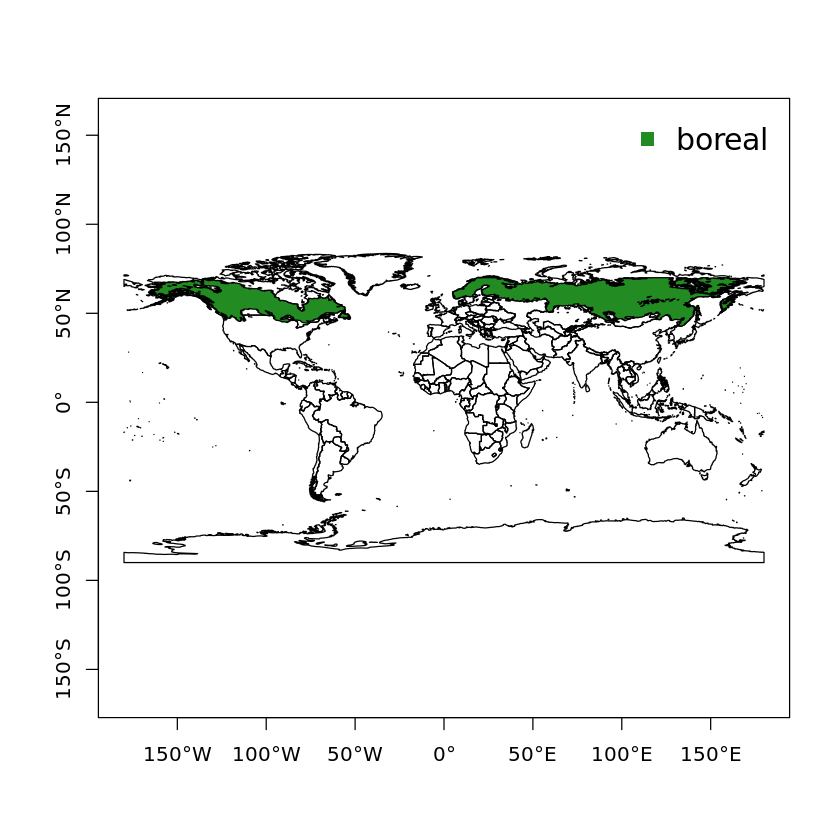

In [5]:
# Visualizing boreal
plot(shp_world, axes=TRUE)
plot(boreal, col="forestgreen", add=TRUE)
legend("topright", legend="boreal", col="forestgreen", bty="n", pch=15, cex=1.5)


In [6]:
# Re-projecting boreal shp
projection(gedi_rh25)
proj4string(boreal)<-CRS("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +towgs84=0,0,0")
boreal2 <- sp::spTransform(boreal, CRS(projection(gedi_rh25)))

[1] "+proj=cea +lon_0=0 +lat_ts=30 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0"

In [7]:
# Clipping raster within boreal
ic2_rh25_clip<-mask(ic2_rh25,boreal2)
ic2_rh50_clip<-mask(ic2_rh50,boreal2)
ic2_rh75_clip<-mask(ic2_rh75,boreal2)
ic2_rh98_clip<-mask(ic2_rh98,boreal2)

gedi_rh25_clip<-mask(gedi_rh25,boreal2)
gedi_rh50_clip<-mask(gedi_rh50,boreal2)
gedi_rh75_clip<-mask(gedi_rh75,boreal2)
gedi_rh98_clip<-mask(gedi_rh98,boreal2)

poly<-rasterToPolygons(raster(extent(gedi_rh98_clip[[1]])),dissolve = T)

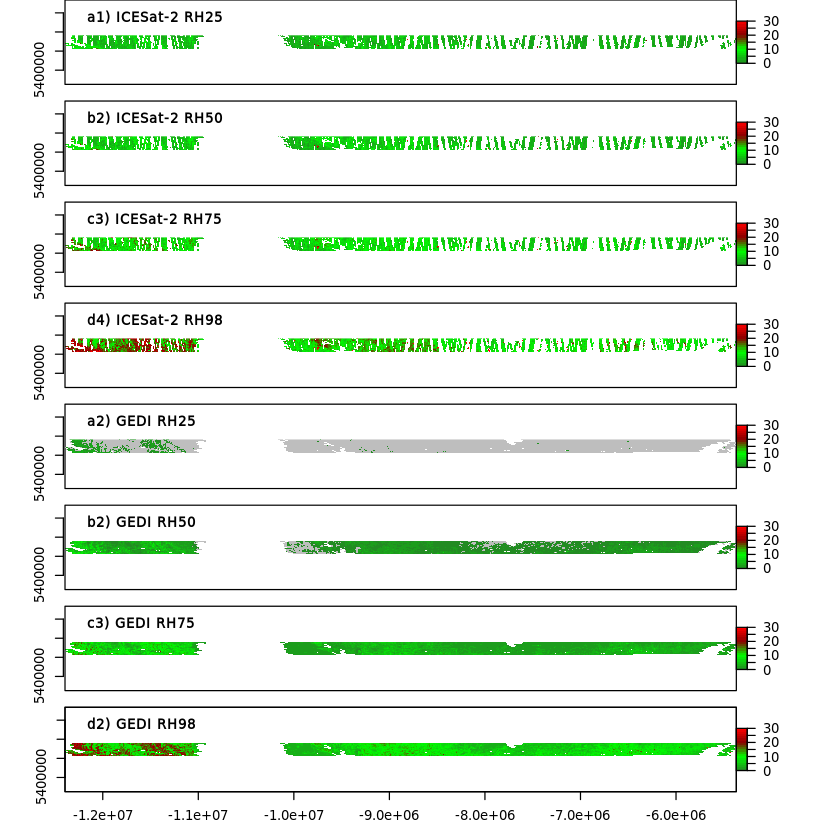

In [8]:
# Visualizing RH metrics across boreal
ic2_rh25_clip<-cropExtent(ic2_rh25_clip[[1]])
ic2_rh50_clip<-cropExtent(ic2_rh50_clip[[1]])
ic2_rh75_clip<-cropExtent(ic2_rh75_clip[[1]])
ic2_rh98_clip<-cropExtent(ic2_rh98_clip[[1]])

ic2_rh25_clip[ic2_rh25_clip[]>30]<-30
ic2_rh50_clip[ic2_rh50_clip[]>30]<-30
ic2_rh75_clip[ic2_rh75_clip[]>30]<-30
ic2_rh98_clip[ic2_rh98_clip[]>30]<-30

gedi_rh25_clip<-cropExtent(gedi_rh25_clip[[1]])
gedi_rh50_clip<-cropExtent(gedi_rh50_clip[[1]])
gedi_rh75_clip<-cropExtent(gedi_rh75_clip[[1]])
gedi_rh98_clip<-cropExtent(gedi_rh98_clip[[1]])

gedi_rh25_clip[gedi_rh25_clip[]>30]<-30
gedi_rh50_clip[gedi_rh50_clip[]>30]<-30
gedi_rh75_clip[gedi_rh75_clip[]>30]<-30
gedi_rh98_clip[gedi_rh98_clip[]>30]<-30

col = colorRampPalette(c("forestgreen","green","darkred","red"))(20)
par(mfrow=c(8,1), mar=c(1,2,0,0), oma=c(2,2,0,0))
plot(ic2_rh25_clip[[1]], col=col,axes=F, zlim=c(0,30));plot(ic2_rh25_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("a1) ICESat-2 RH25"), bty="n", text.font = 2)
plot(ic2_rh50_clip[[1]], col=col,axes=F, zlim=c(0,30));plot(ic2_rh50_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("b2) ICESat-2 RH50"), bty="n", text.font = 2)
plot(ic2_rh75_clip[[1]], col=col,axes=F, zlim=c(0,30));plot(ic2_rh75_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("c3) ICESat-2 RH75"), bty="n", text.font = 2)
plot(ic2_rh98_clip[[1]], col=col,axes=F, zlim=c(0,30));plot(ic2_rh98_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("d4) ICESat-2 RH98"), bty="n", text.font = 2)
plot(gedi_rh25_clip[[1]], col=col,axes=F, zlim=c(0,30));plot(gedi_rh25_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("a2) GEDI RH25"), bty="n", text.font = 2)
plot(gedi_rh50_clip[[1]], col=col,axes=F, zlim=c(0,30));plot(gedi_rh50_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("b2) GEDI RH50"), bty="n", text.font = 2)
plot(gedi_rh75_clip[[1]], col=col,axes=F, zlim=c(0,30));plot(gedi_rh75_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("c3) GEDI RH75"), bty="n", text.font = 2)
plot(gedi_rh98_clip[[1]], col=col, zlim=c(0,30));plot(gedi_rh98_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F); legend("topleft", legend=c("d2) GEDI RH98"), bty="n", text.font = 2)

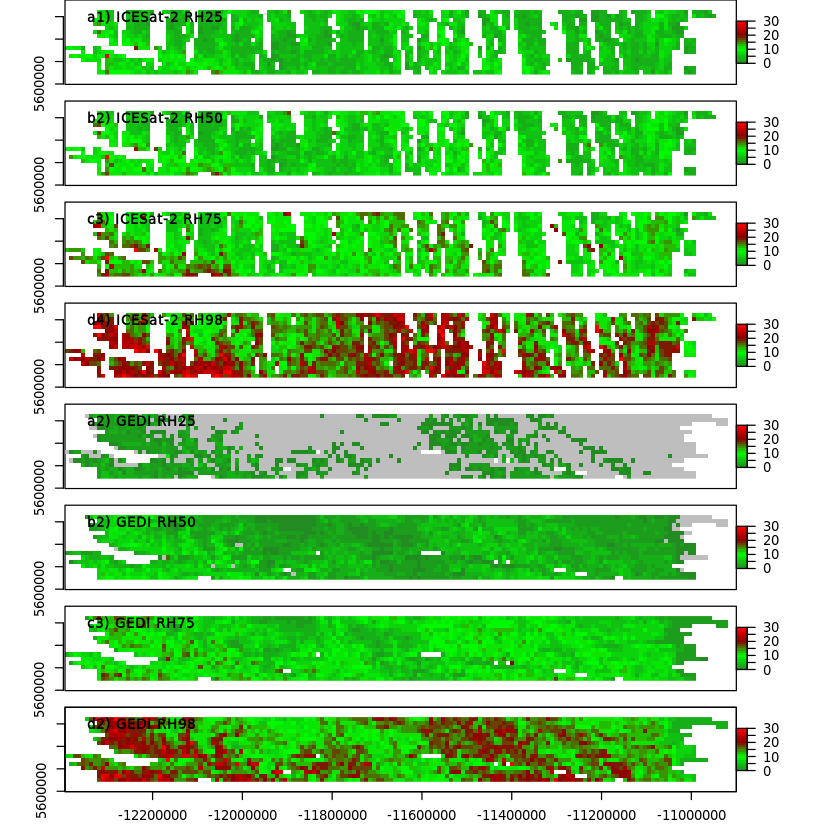

In [9]:
# visualzing RH across North America
col = colorRampPalette(c("forestgreen","green","darkred","red"))(20)
#col = rev(colorRampPalette(c("darkred","red","lightskyblue","blue","blue4"))(20))

xlim=c(-1.5*10^7,-1.09*10^7)

par(mfrow=c(8,1), mar=c(1,2,0,0), oma=c(2,2,0,0))
plot(ic2_rh25_clip[[1]], col=col,axes=F, xlim=xlim,zlim=c(0,30));plot(ic2_rh25_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("a1) ICESat-2 RH25"), bty="n", text.font = 2)
plot(ic2_rh50_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(ic2_rh50_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("b2) ICESat-2 RH50"), bty="n", text.font = 2)
plot(ic2_rh75_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(ic2_rh75_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("c3) ICESat-2 RH75"), bty="n", text.font = 2)
plot(ic2_rh98_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(ic2_rh98_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("d4) ICESat-2 RH98"), bty="n", text.font = 2)
plot(gedi_rh25_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(gedi_rh25_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("a2) GEDI RH25"), bty="n", text.font = 2)
plot(gedi_rh50_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(gedi_rh50_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("b2) GEDI RH50"), bty="n", text.font = 2)
plot(gedi_rh75_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(gedi_rh75_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("c3) GEDI RH75"), bty="n", text.font = 2)
plot(gedi_rh98_clip[[1]], col=col, zlim=c(0,30),xlim=xlim);plot(gedi_rh98_clip[[1]], col="gray",axes=F,xlim=xlim, zlim=c(-50,0), add=T, legend=F); legend("topleft", legend=c("d2) GEDI RH98"), bty="n", text.font = 2)

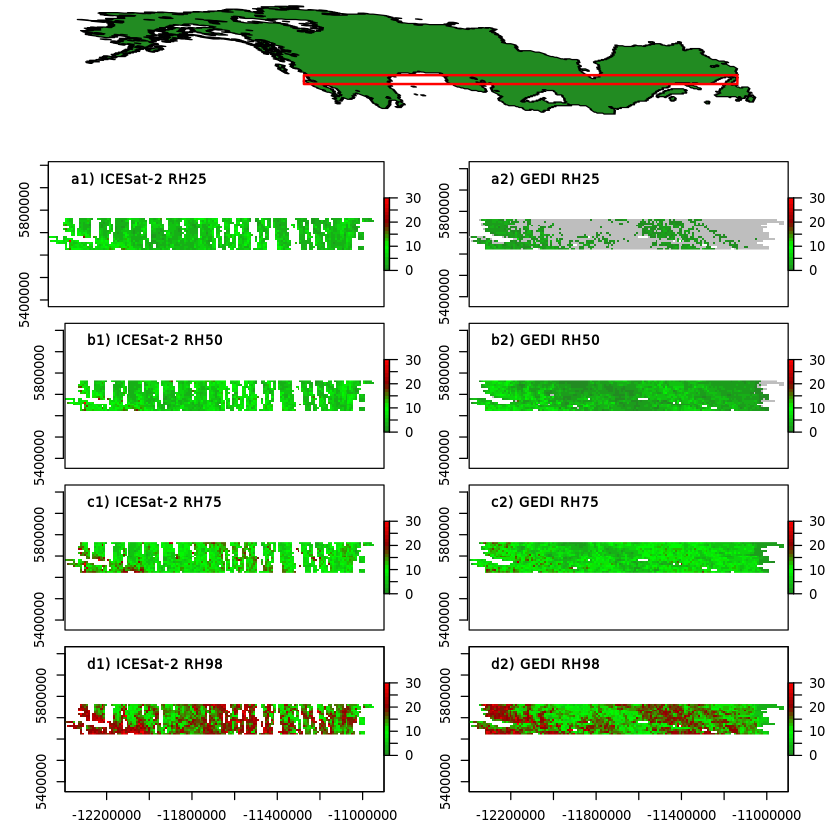

In [10]:

# Visualizing boreal

col = colorRampPalette(c("forestgreen","green","darkred","red"))(20)
#col = rev(colorRampPalette(c("darkred","red","lightskyblue","blue","blue4"))(20))

xlim=c(-1.5*10^7,-1.09*10^7)

#windows()
layout(matrix(c(1,2:5,1,6:9), ncol=2))
par(mar=c(1,2,0,0), oma=c(2,2,0,0))
plot(boreal2, col="forestgreen",xlim=c(-1.5*10^7,-5*10^6))
poly<-rasterToPolygons(raster(extent(gedi_rh98_clip[[1]])),dissolve = T)
plot(poly, border="red", lwd=2,add=T)


#par(mfrow=c(4,2), mar=c(1,2,0,0), oma=c(2,2,0,0))
plot(ic2_rh25_clip[[1]], col=col,axes=F, ylab="", xlim=xlim,zlim=c(0,30));axis(side=2);plot(ic2_rh25_clip[[1]],axes=F, col="gray", zlim=c(-50,0), add=T, legend=F);legend("topleft", legend=c("a1) ICESat-2 RH25"), bty="n", text.font = 2)
plot(gedi_rh25_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(gedi_rh25_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("a2) GEDI RH25"), bty="n", text.font = 2)

plot(ic2_rh50_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(ic2_rh50_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("b1) ICESat-2 RH50"), bty="n", text.font = 2)
plot(gedi_rh50_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(gedi_rh50_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("b2) GEDI RH50"), bty="n", text.font = 2)

plot(ic2_rh75_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(ic2_rh75_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("c1) ICESat-2 RH75"), bty="n", text.font = 2)
plot(gedi_rh75_clip[[1]], col=col,axes=F, xlim=xlim, zlim=c(0,30));plot(gedi_rh75_clip[[1]], col="gray",axes=F, zlim=c(-50,0), add=T, legend=F);axis(side=2); legend("topleft", legend=c("c2) GEDI RH75"), bty="n", text.font = 2)

plot(ic2_rh98_clip[[1]], col=col,axes=T, xlim=xlim, zlim=c(0,30));plot(ic2_rh98_clip[[1]], col="gray",axes=T, zlim=c(-50,0), add=T, legend=F); legend("topleft", legend=c("d1) ICESat-2 RH98"), bty="n", text.font = 2)
plot(gedi_rh98_clip[[1]], col=col, zlim=c(0,30),xlim=xlim);plot(gedi_rh98_clip[[1]], col="gray",axes=F,xlim=xlim, zlim=c(-50,0), add=T, legend=F); legend("topleft", legend=c("d2) GEDI RH98"), bty="n", text.font = 2)


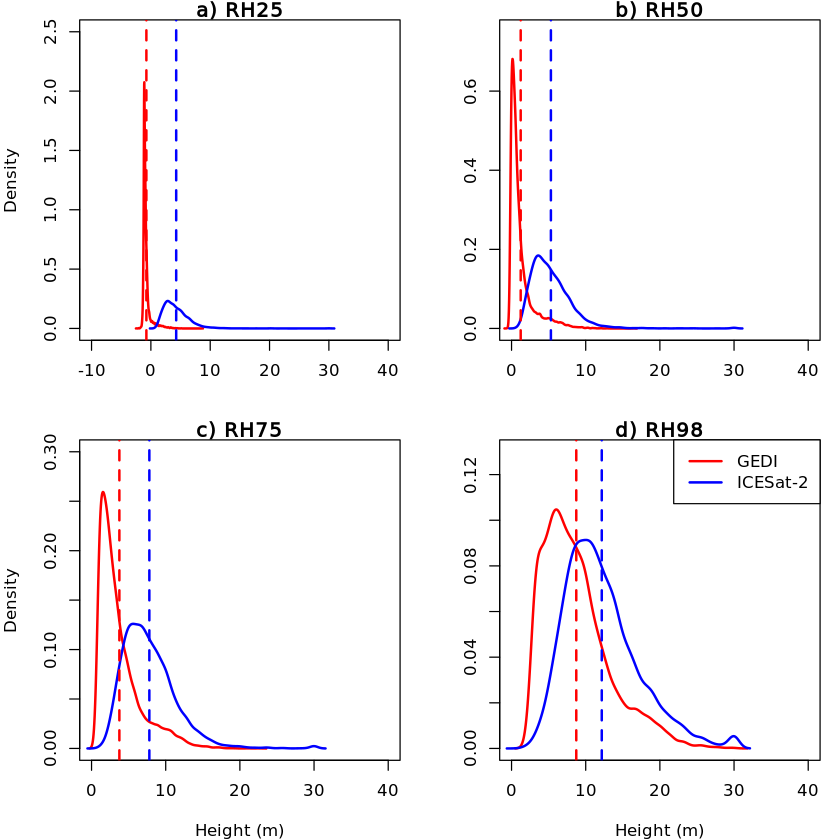

In [11]:
# Plot RH distribution
par(mfrow=c(2,2), mar=c(4,4,1,1), oma=c(0,0,0,0))

mxlim<-40
#rh25
plot(c(-10,mxlim),c(0,2.5), col="white", xlab= "", ylab="Density", main="a) RH25")
lines(density(na.omit(gedi_rh25_clip$gedi_northamerica_boreal_combined_rh25.1[])), col="red", lwd=2)
lines(density(na.omit(ic2_rh25_clip$atl08_northamerica_boreal_combined_rh25.1[])), col="blue", lwd=2)
abline(v=mean(gedi_rh25_clip$gedi_northamerica_boreal_combined_rh25.1[], na.rm=T), col="red", lwd=2, lty=2)
abline(v=mean(ic2_rh25_clip$atl08_northamerica_boreal_combined_rh25.1[], na.rm=T), col="blue", lwd=2, lty=2)

#legend("topright", legend=c("GEDI", "ICESat-2"), col=c("red", "blue"), lwd=2)

#rh50
plot(c(0,mxlim),c(0,0.75), col="white", xlab= "", ylab="", main="b) RH50")
lines(density(na.omit(gedi_rh50_clip$gedi_northamerica_boreal_combined_rh50.1[])), col="red", lwd=2)
lines(density(na.omit(ic2_rh50_clip$atl08_northamerica_boreal_combined_rh50.1[])), col="blue", lwd=2)
abline(v=mean(gedi_rh50_clip$gedi_northamerica_boreal_combined_rh50.1[], na.rm=T), col="red", lwd=2, lty=2)
abline(v=mean(ic2_rh50_clip$atl08_northamerica_boreal_combined_rh50.1[], na.rm=T), col="blue", lwd=2, lty=2)

#legend("topright", legend=c("GEDI", "ICESat-2"), col=c("red", "blue"), lwd=2)

#rh75
plot(c(0,mxlim),c(0,0.3), col="white", xlab= "Height (m)", ylab="Density", main="c) RH75")
lines(density(na.omit(gedi_rh75_clip$gedi_northamerica_boreal_combined_rh75.1[])), col="red", lwd=2)
lines(density(na.omit(ic2_rh75_clip$atl08_northamerica_boreal_combined_rh75.1[])), col="blue", lwd=2)
abline(v=mean(gedi_rh75_clip$gedi_northamerica_boreal_combined_rh75.1[], na.rm=T), col="red", lwd=2, lty=2)
abline(v=mean(ic2_rh75_clip$atl08_northamerica_boreal_combined_rh75.1[], na.rm=T), col="blue", lwd=2, lty=2)

#legend("topright", legend=c("GEDI", "ICESat-2"), col=c("red", "blue"), lwd=2)

#rh98
plot(c(0,mxlim),c(0,0.13), col="white", xlab= "Height (m)", ylab="", main="d) RH98")
lines(density(na.omit(gedi_rh98_clip$gedi_northamerica_boreal_combined_rh98.1[])), col="red", lwd=2)
lines(density(na.omit(ic2_rh98_clip$atl08_northamerica_boreal_combined_rh98.1[])), col="blue", lwd=2)
abline(v=mean(gedi_rh98_clip$gedi_northamerica_boreal_combined_rh98.1[], na.rm=T), col="red", lwd=2, lty=2)
abline(v=mean(ic2_rh98_clip$atl08_northamerica_boreal_combined_rh98.1[], na.rm=T), col="blue", lwd=2, lty=2)

legend("topright", legend=c("GEDI", "ICESat-2"), col=c("red", "blue"), lwd=2)
